In [2]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import exp
from scipy.integrate import odeint

In [4]:
def F(x, t, R0):
    s, e, i = x
		
    beta = R0(t) * gamma if callable(R0) else R0 * gamma
    ne = beta * s * i
		
    ds = - ne
    de = ne - sigma * e
    di = sigma * e - gamma * i
		
    return ds, de, di

In [14]:
"""
초기값 설정
"""
	
i_0 = 1e-7
e_0 = 4 * i_0
s_0 = 1 - i_0 - e_0
	
x_0 = s_0, e_0, i_0 
	
gamma = 1 / 18 # 지속기 18일
sigma = 1 / 5.2 # 잠복기 5.2일

In [16]:
list (x_0)



[0.9999995, 4e-07, 1e-07]

In [18]:
def solve_path(R0, t_vec, x_init=x_0):
    G = lambda x, t: F(x, t, R0)
    s_path, e_path, i_path = odeint(G, x_init, t_vec).transpose()
		
    c_path = 1 - s_path - e_path
		
    return i_path, c_path

In [20]:
t_length = 550
grid_size = 1000
t_vec = np.linspace(0, t_length, grid_size)

In [22]:
list (t_vec)

[0.0,
 0.5505505505505506,
 1.1011011011011012,
 1.6516516516516517,
 2.2022022022022023,
 2.7527527527527527,
 3.3033033033033035,
 3.8538538538538543,
 4.404404404404405,
 4.954954954954955,
 5.505505505505505,
 6.056056056056057,
 6.606606606606607,
 7.157157157157157,
 7.7077077077077085,
 8.258258258258259,
 8.80880880880881,
 9.35935935935936,
 9.90990990990991,
 10.46046046046046,
 11.01101101101101,
 11.561561561561563,
 12.112112112112113,
 12.662662662662663,
 13.213213213213214,
 13.763763763763764,
 14.314314314314315,
 14.864864864864865,
 15.415415415415417,
 15.965965965965967,
 16.516516516516518,
 17.067067067067068,
 17.61761761761762,
 18.16816816816817,
 18.71871871871872,
 19.26926926926927,
 19.81981981981982,
 20.37037037037037,
 20.92092092092092,
 21.47147147147147,
 22.02202202202202,
 22.572572572572575,
 23.123123123123126,
 23.673673673673676,
 24.224224224224226,
 24.774774774774777,
 25.325325325325327,
 25.875875875875877,
 26.426426426426428,
 26.976976

In [25]:
R0_vals = np.linspace(1.6, 3.0, 6)
labels = [f'$R0 = {r:.2f}$' for r in R0_vals]
i_paths, c_paths = [], []

In [27]:
list (i_paths)

[]

In [29]:
for r in R0_vals:
    i_path, c_path = solve_path(r, t_vec)
    i_paths.append(i_path)
    c_paths.append(c_path)

In [31]:
list (i_paths)

[array([1.00000000e-07, 1.36924441e-07, 1.69358625e-07, 1.97946645e-07,
        2.23261024e-07, 2.46016911e-07, 2.66411222e-07, 2.84443956e-07,
        3.00253519e-07, 3.14696139e-07, 3.27918907e-07, 3.39921822e-07,
        3.50839546e-07, 3.61140472e-07, 3.70864637e-07, 3.80012039e-07,
        3.88672320e-07, 3.97029170e-07, 4.05088062e-07, 4.12848996e-07,
        4.20379703e-07, 4.27759266e-07, 4.34987802e-07, 4.42065990e-07,
        4.49052393e-07, 4.55984656e-07, 4.62862778e-07, 4.69689118e-07,
        4.76506806e-07, 4.83331949e-07, 4.90164548e-07, 4.97008627e-07,
        5.03891138e-07, 5.10817074e-07, 5.17786435e-07, 5.24804192e-07,
        5.31886347e-07, 5.39034114e-07, 5.46247492e-07, 5.53532080e-07,
        5.60897086e-07, 5.68342644e-07, 5.75868856e-07, 5.83482300e-07,
        5.91186926e-07, 5.98982733e-07, 6.06870434e-07, 6.14856306e-07,
        6.22941822e-07, 6.31126983e-07, 6.39413596e-07, 6.47807233e-07,
        6.56308286e-07, 6.64916755e-07, 6.73632887e-07, 6.824622

In [42]:
def plot_paths(paths, labels, times=t_vec):
    fig, ax = plt.subplots()
		
    for path, label in zip(paths, labels):
        ax.plot(times, path, label=label)
			
    ax.legend(loc='upper left')
		
    plt.show()

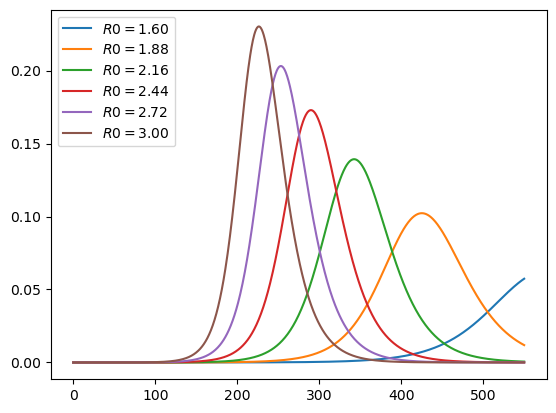

In [44]:
plot_paths(i_paths, labels)

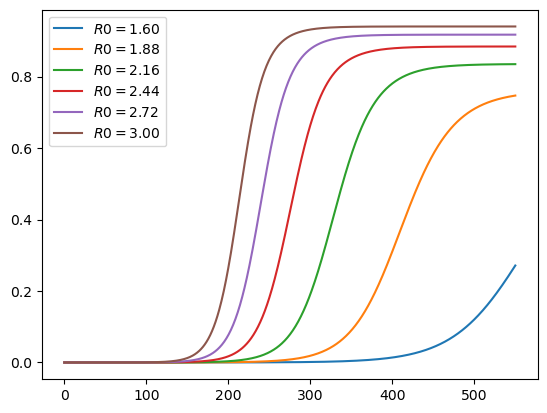

In [46]:
plot_paths(c_paths, labels) 



In [48]:
def R0_mitigating(t, r0=3, eta=1, r_bar=1.6):
    R0 = r0 * exp(- eta * t) + (1 - exp(- eta * t)) * r_bar
    return R0

In [50]:
eta_vals = 1/5, 1/10, 1/20, 1/50, 1/100
labels = [fr'$\eta = {eta:.2f}$' for eta in eta_vals]

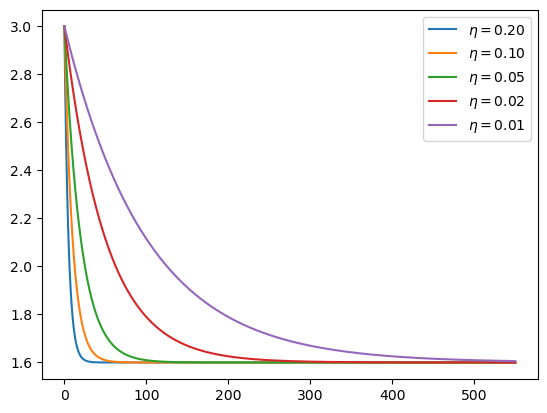

In [52]:
fig, ax = plt.subplots()
	
for eta, label in zip(eta_vals, labels):
    ax.plot(t_vec, R0_mitigating(t_vec, eta=eta), label=label)
	
ax.legend()
plt.show()  

In [54]:
i_paths, c_paths = [], []
	
for eta in eta_vals:
    R0 = lambda t: R0_mitigating(t, eta=eta)
    i_path, c_path = solve_path(R0, t_vec)
    i_paths.append(i_path)
    c_paths.append(c_path)

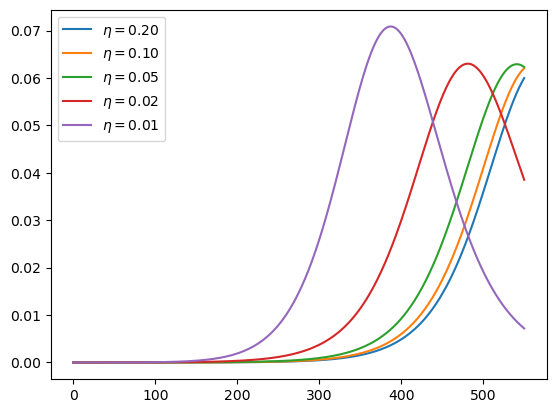

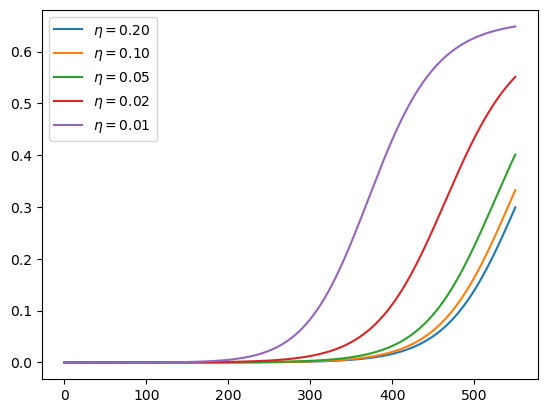

In [56]:
plot_paths(i_paths, labels)
plot_paths(c_paths, labels)

In [58]:
pop_size = 3.3e8
	
i_0 = 25_000 / pop_size
e_0 = 75_000 / pop_size
s_0 = 1 - i_0 - e_0
x_0 = s_0, e_0, i_0 

In [60]:
R0_paths = (lambda t: 0.5 if t < 30 else 2,
    lambda t: 0.5 if t < 120 else 2)
		
labels = [f'scenario {i}' for i in (1, 2)]
	
i_paths, c_paths = [], []
	
for R0 in R0_paths:
    i_path, c_path = solve_path(R0, t_vec, x_init=x_0)
    i_paths.append(i_path)
    c_paths.append(c_path)  

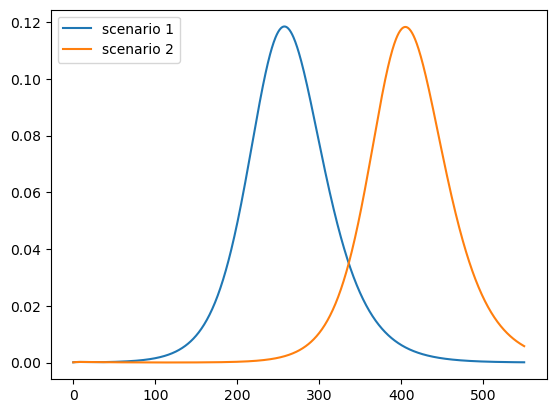

In [62]:
plot_paths(i_paths, labels)



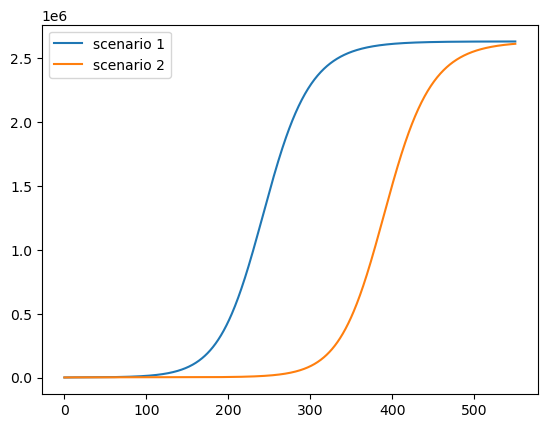

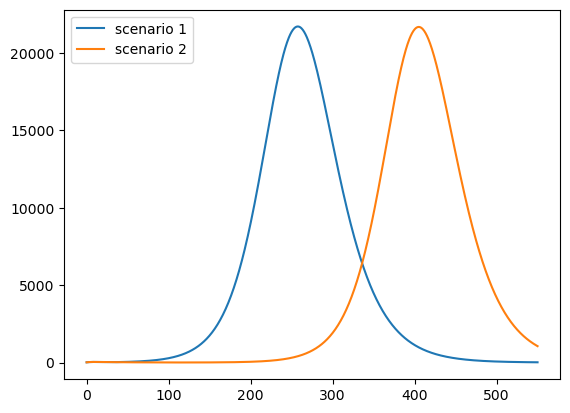

In [64]:
nu = 0.01   
	
paths = [path * nu * pop_size for path in c_paths] # 누적사망
plot_paths(paths, labels)
	
paths = [path * nu * gamma * pop_size for path in i_paths] #일일사망
plot_paths(paths, labels)